In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/media/dan/Data/git/spacetimeformer/spacetimeformer/data/toy_dset2.csv')

In [5]:
waves = []
for i in range(0, 19):
    waves.append(data.iloc[:, i].values)

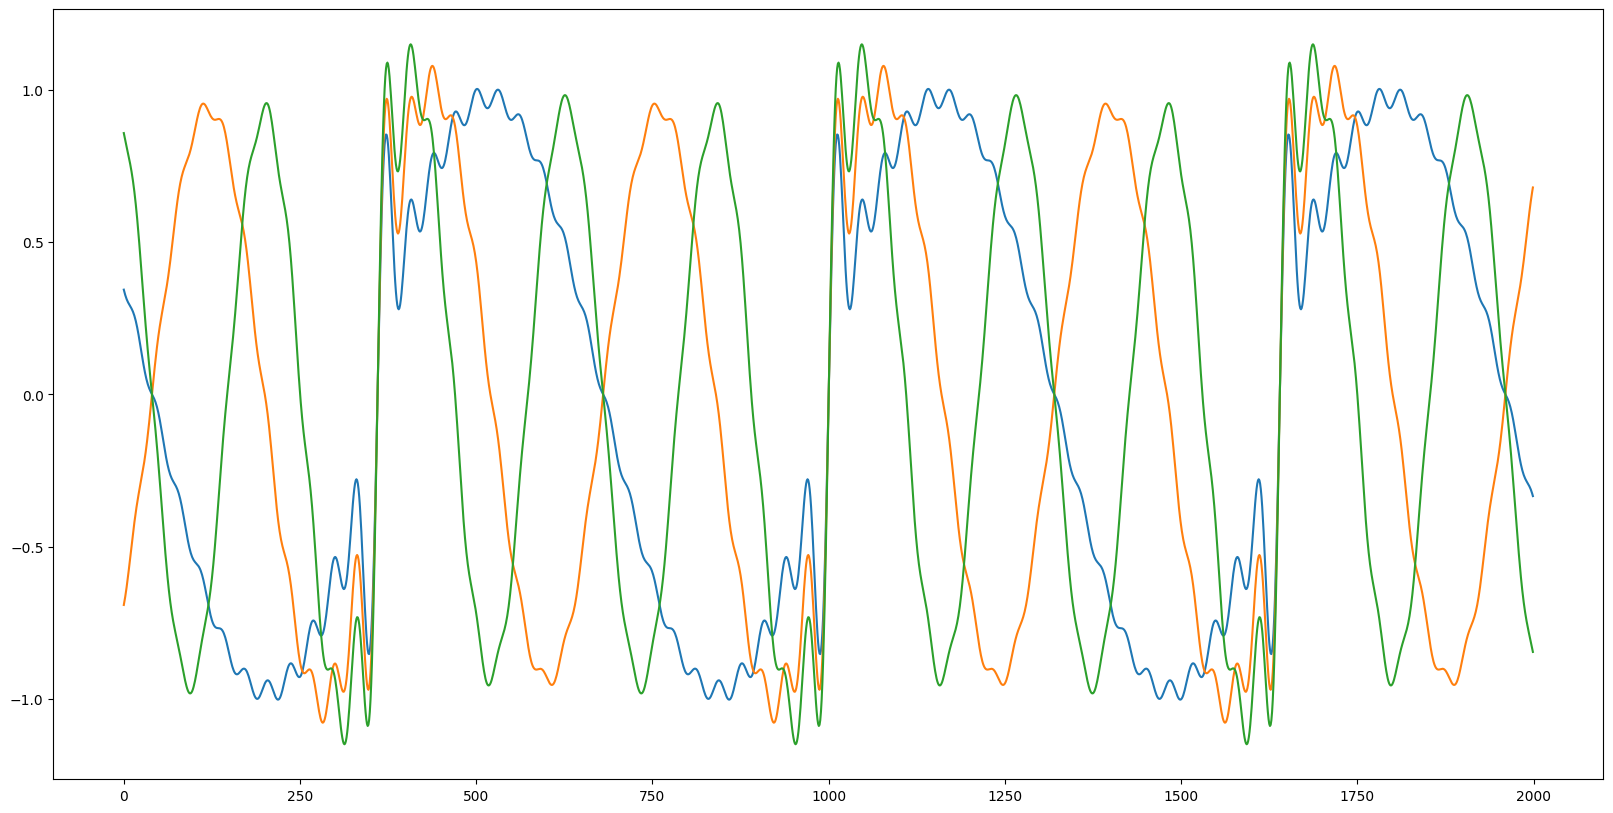

In [11]:
plt.figure(figsize=(20, 10))
for i in range(0, 3):
    plt.plot(waves[i], label=f"{i}")
# plt.plot(waves[0], label='0')


In [28]:
import numpy as np
import pandas as pd

# Given parameters
D = 20
num_timesteps = 2000

# Generate the timesteps
timesteps = np.arange(1, num_timesteps + 1)

s4 = 500

# Initialize an empty dataframe to store the sequences
df = pd.DataFrame()
# For each sequence i, compute the values using the given equation
for i in range(1, D + 1):
    Y_it = np.sin((2 * np.pi * i * timesteps) / s4)
    summation = sum([np.sin(2 * np.pi * j * timesteps / s4) for j in range(1, D + 1) if j != i])
    Y_it += (1 / (D + 1)) * summation
    df[f'D{i}'] = Y_it

df.head()


,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20
0,0.136938,0.148904,0.160866,0.172822,0.184771,0.196711,0.208639,0.220553,0.232453,0.244336,0.256200,0.268043,0.279863,0.291659,0.303429,0.315171,0.326882,0.338562,0.350208,0.361818
1,0.269753,0.293672,0.317560,0.341403,0.365185,0.388892,0.412509,0.436020,0.459411,0.482667,0.505774,0.528717,0.551481,0.574051,0.596415,0.618557,0.640463,0.662121,0.683515,0.704633
2,0.394503,0.430347,0.466090,0.501679,0.537066,0.572198,0.607028,0.641504,0.675578,0.709202,0.742328,0.774908,0.806897,0.838248,0.868918,0.898863,0.928041,0.956409,0.983927,1.010557
3,0.507597,0.555328,0.602817,0.649945,0.696593,0.742642,0.787977,0.832482,0.876046,0.918558,0.959912,1.000001,1.038727,1.075989,1.111695,1.145754,1.178080,1.208591,1.237211,1.263867
4,0.605955,0.665520,0.724613,0.783002,0.840456,0.896749,0.951659,1.004968,1.056466,1.105950,1.153225,1.198104,1.240410,1.279977,1.316647,1.350276,1.380732,1.407895,1.431656,1.451923


In [29]:
waves2 = []
for i in range(0, 19):
    waves2.append(df.iloc[:, i].values)

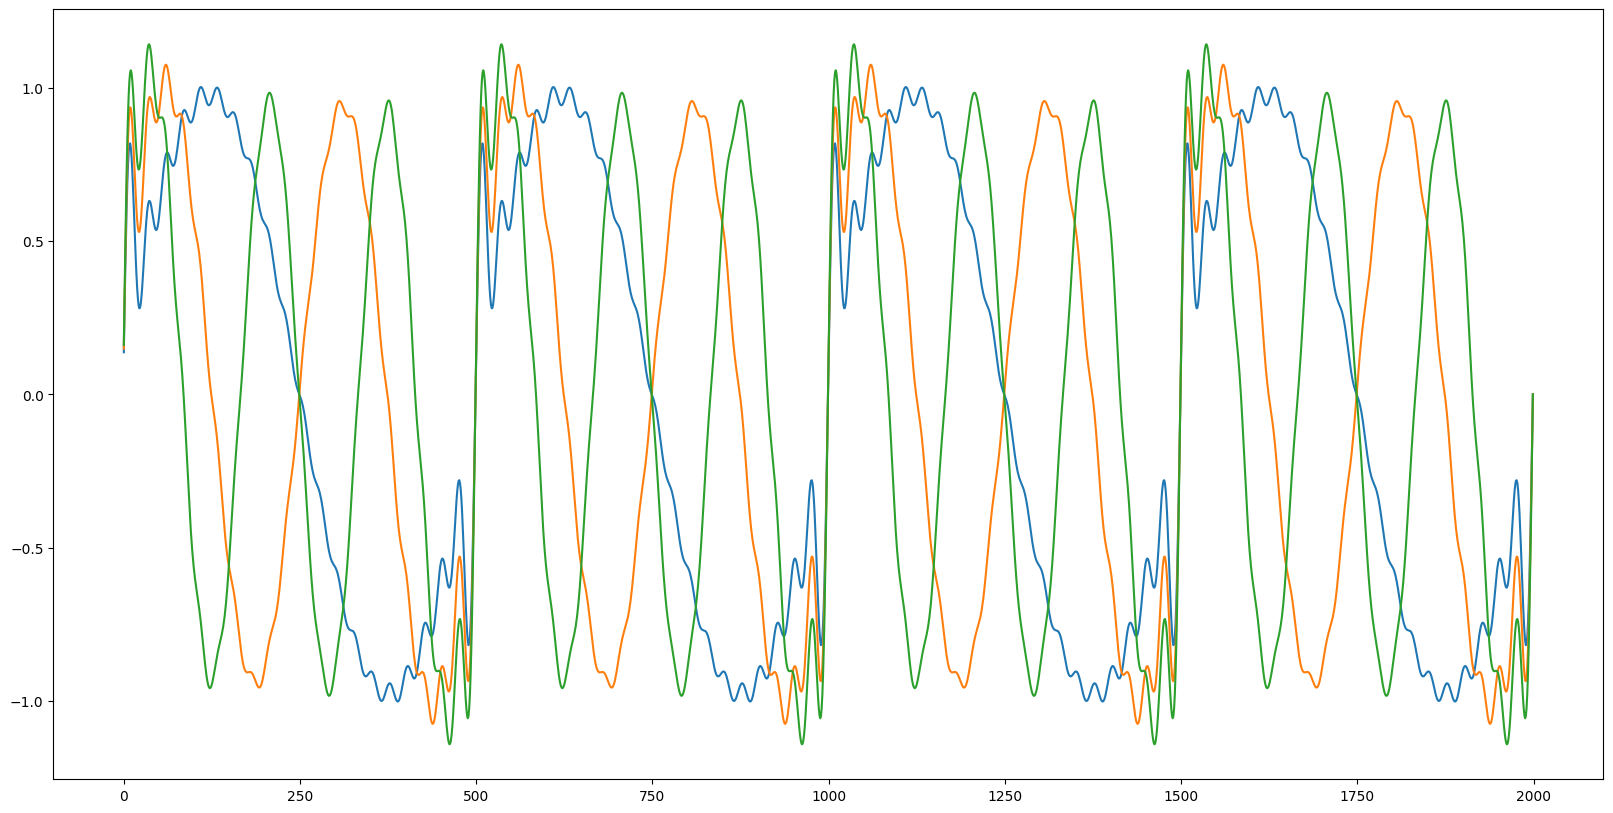

In [30]:
plt.figure(figsize=(20, 10))
for i in range(0, 3):
    plt.plot(waves2[i], label=f"{i}")
# plt.plot(waves[0], label='0')


In [26]:
import mne
import pandas as pd


In [52]:
picks = ["EEG V'1", "EEG V'2", "EEG V'3"]
sr = 2**8

raw_edf = mne.io.read_raw_edf('/media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF', preload=True)
reref = raw_edf.resample(sr, n_jobs=60)
data = reref.get_data(picks=picks)
df = pd.DataFrame(data.T)
df.columns = picks
sF = reref.info['sfreq']
sampling_period_ms = 1000 / sF
date_range = pd.date_range(start='2020-01-01 00:00:00', periods=len(df), freq='{}ms'.format(sampling_period_ms))
df['datetime'] = date_range
df.to_csv("eeg.csv", index=False)
print(f"eeg.csv: {df.shape}")

raw_edf = mne.io.read_raw_edf('/media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF', preload=True)
raw_edf.info['bads'].extend(['ECG ECG',
 'Pt Mic',
 'MD Mic',
 'Picture',
 'Story',
 'Baseline',
 'Music',
 'Noise',
 'Hand Motor'])
raw_edf = raw_edf.set_eeg_reference(ref_channels='average', projection=False)
reref = raw_edf.resample(sr, n_jobs=60)
data = reref.get_data(picks=picks)
df = pd.DataFrame(data.T)
df.columns = picks
sF = reref.info['sfreq']
sampling_period_ms = 1000 / sF
date_range = pd.date_range(start='2020-01-01 00:00:00', periods=len(df), freq='{}ms'.format(sampling_period_ms))
df['datetime'] = date_range
df.to_csv("eeg_avgref.csv", index=False)
print(f"eeg_avgref.csv: {df.shape}")

raw_edf = mne.io.read_raw_edf('/media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF', preload=True)
reref = raw_edf.resample(sr, n_jobs=60)
picks = ["EEG V'1", "EEG V'2", "EEG V'3", "EEG V'4"]

data = reref.get_data(picks=picks)
data = np.diff(data,axis=0)
df = pd.DataFrame(data.T)
df.columns = ["v'1-v'2", "v'2-v'3", "v'3-v'4"]
sF = reref.info['sfreq']
sampling_period_ms = 1000 / sF
date_range = pd.date_range(start='2020-01-01 00:00:00', periods=len(df), freq='{}ms'.format(sampling_period_ms))
df['datetime'] = date_range
df.to_csv("eeg_bipol.csv", index=False)
print(f"eeg_bipol.csv: {df.shape}")



Extracting EDF parameters from /media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 331007  =      0.000 ...   161.625 secs...


/tmp/ipykernel_17803/2423979118.py:4: RuntimeWarning: Omitted 4 annotation(s) that were outside data range.
  raw_edf = mne.io.read_raw_edf('/media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF', preload=True)
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=60)]: Done 102 tasks      | elapsed:    0.7s
[Parallel(n_jobs=60)]: Done 149 out of 173 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=60)]: Done 173 out of 173 | elapsed:    1.2s finished


eeg.csv: (41376, 4)
Extracting EDF parameters from /media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 331007  =      0.000 ...   161.625 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/tmp/ipykernel_17803/2423979118.py:16: RuntimeWarning: Omitted 4 annotation(s) that were outside data range.
  raw_edf = mne.io.read_raw_edf('/media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF', preload=True)
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=60)]: Done 102 tasks      | elapsed:    0.7s
[Parallel(n_jobs=60)]: Done 149 out of 173 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=60)]: Done 173 out of 173 | elapsed:    1.2s finished


eeg_avgref.csv: (41376, 4)
Extracting EDF parameters from /media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 331007  =      0.000 ...   161.625 secs...


/tmp/ipykernel_17803/2423979118.py:38: RuntimeWarning: Omitted 4 annotation(s) that were outside data range.
  raw_edf = mne.io.read_raw_edf('/media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF', preload=True)
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=60)]: Done 102 tasks      | elapsed:    0.7s
[Parallel(n_jobs=60)]: Done 149 out of 173 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=60)]: Done 173 out of 173 | elapsed:    1.2s finished


eeg_bipol.csv: (41376, 4)


In [115]:
bads = ['ECG ECG',
 'Pt Mic',
 'MD Mic',
 'Picture',
 'Story',
 'Baseline',
 'Music',
 'Noise',
 'Hand Motor',
 "EEG TO'7",
 "EEG TO'8"]


In [117]:
raw_edf = mne.io.read_raw_edf('/media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF', preload=True)
# raw_edf.info['bads'].extend(bads)
# raw_edf = raw_edf.set_eeg_reference(ref_channels='average', projection=False)
reref = raw_edf.resample(sr, n_jobs=60)

ch = raw_edf.info['ch_names']

touse = [x for x in ch if x not in bads]
data = reref.get_data(picks=touse)
data = data*1000
df = pd.DataFrame(data.T)
df.columns = touse
sF = reref.info['sfreq']
sampling_period_ms = 1000 / sF
date_range = pd.date_range(start='2020-01-01 00:00:00', periods=len(df), freq='{}ms'.format(sampling_period_ms))
df['datetime'] = date_range
df.to_csv("eeg_full.csv", index=False)
print(f"eeg_full.csv: {df.shape}")

Extracting EDF parameters from /media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 331007  =      0.000 ...   161.625 secs...


/tmp/ipykernel_17803/2408636772.py:1: RuntimeWarning: Omitted 4 annotation(s) that were outside data range.
  raw_edf = mne.io.read_raw_edf('/media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF', preload=True)
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=60)]: Done 102 tasks      | elapsed:    0.8s
[Parallel(n_jobs=60)]: Done 149 out of 173 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=60)]: Done 173 out of 173 | elapsed:    1.2s finished


eeg_full.csv: (41376, 163)


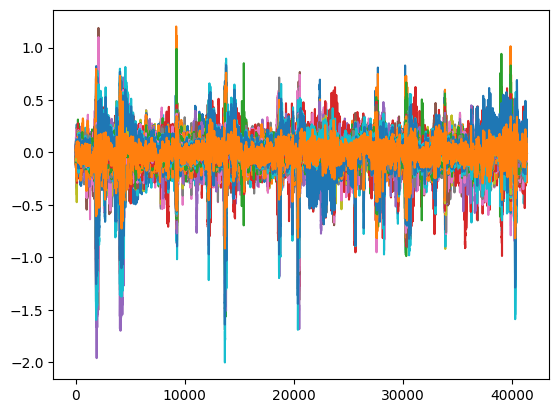

In [121]:
plt.plot(data.T);

In [119]:
# find what row in data.T has values > 0.005

d = data.T > 0.005
mask = d.sum(axis=0) > 0
indexs = np.where(mask)[0]
toremove = [touse[i] for i in indexs]

In [120]:
toremove

["EEG Q'3",
 "EEG Q'4",
 "EEG Q'5",
 "EEG Q'6",
 "EEG Q'7",
 "EEG Q'8",
 "EEG Q'9",
 "EEG Q'10",
 "EEG Q'11",
 "EEG Q'12",
 "EEG Q'13",
 "EEG Q'14",
 "EEG Q'15",
 "EEG Q'16",
 "EEG SP'1",
 "EEG SP'2",
 "EEG SP'3",
 "EEG SP'4",
 "EEG SP'5",
 "EEG SP'6",
 "EEG SP'7",
 "EEG SP'8",
 "EEG SP'9",
 "EEG SP'10",
 "EEG IP'1",
 "EEG IP'2",
 "EEG IP'3",
 "EEG IP'4",
 "EEG IP'5",
 "EEG IP'6",
 "EEG IP'7",
 "EEG IP'8",
 "EEG IP'9",
 "EEG IP'10",
 "EEG IP'11",
 "EEG IP'12",
 "EEG V'1",
 "EEG V'2",
 "EEG V'3",
 "EEG V'4",
 "EEG V'5",
 "EEG V'6",
 "EEG V'7",
 "EEG V'8",
 "EEG O'1",
 "EEG O'2",
 "EEG O'3",
 "EEG O'4",
 "EEG O'5",
 "EEG O'6",
 "EEG O'7",
 "EEG O'8",
 "EEG O'9",
 "EEG O'10",
 "EEG TO'1",
 "EEG TO'2",
 "EEG TO'3",
 "EEG TO'4",
 "EEG TO'5",
 "EEG TO'6",
 "EEG W'1",
 "EEG W'2",
 "EEG W'3",
 "EEG W'4",
 "EEG W'5",
 "EEG W'6",
 "EEG W'7",
 "EEG W'8",
 "EEG W'9",
 "EEG W'10",
 "EEG B'1",
 "EEG B'2",
 "EEG B'3",
 "EEG B'4",
 "EEG B'5",
 "EEG B'6",
 "EEG B'7",
 "EEG B'8",
 "EEG B'9",
 "EEG B'10"

In [59]:
data.shape

(164, 41376)

In [ ]:
raw_edf = mne.io.read_raw_edf('/media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF', preload=True)
raw_edf.info['bads'].extend(['ECG ECG',
 'Pt Mic',
 'MD Mic',
 'Picture',
 'Story',
 'Baseline',
 'Music',
 'Noise',
 'Hand Motor'])
raw_edf = raw_edf.set_eeg_reference(ref_channels='average', projection=False)
reref = raw_edf.resample(sr, n_jobs=60)
data = reref.get_data()
df = pd.DataFrame(data.T)
df.columns = picks
sF = reref.info['sfreq']
sampling_period_ms = 1000 / sF
date_range = pd.date_range(start='2020-01-01 00:00:00', periods=len(df), freq='{}ms'.format(sampling_period_ms))
df['datetime'] = date_range
df.to_csv("eeg_avgref.csv", index=False)
print(f"eeg_avgref.csv: {df.shape}")

Extracting EDF parameters from /media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 331007  =      0.000 ...   161.625 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


/tmp/ipykernel_17803/3620470585.py:1: RuntimeWarning: Omitted 4 annotation(s) that were outside data range.
  raw_edf = mne.io.read_raw_edf('/media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF', preload=True)
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=60)]: Done 102 tasks      | elapsed:    0.7s
[Parallel(n_jobs=60)]: Done 149 out of 173 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=60)]: Done 173 out of 173 | elapsed:    1.1s finished


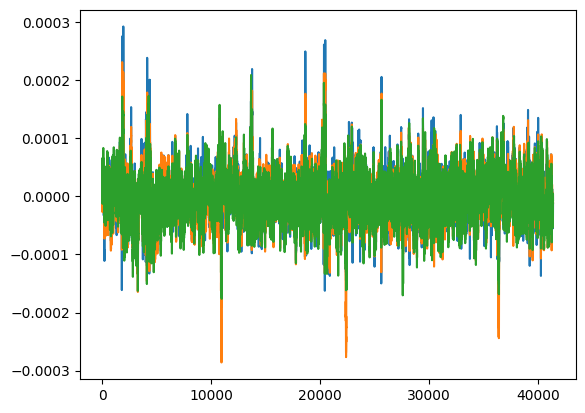

In [51]:
raw_edf = mne.io.read_raw_edf('/media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF', preload=True)
raw_edf.info['bads'].extend(['ECG ECG',
 'Pt Mic',
 'MD Mic',
 'Picture',
 'Story',
 'Baseline',
 'Music',
 'Noise',
 'Hand Motor'])
raw_edf = raw_edf.set_eeg_reference(ref_channels='average', projection=False)

reref = raw_edf.resample(sr, n_jobs=60)
picks = ["EEG V'1", "EEG V'2", "EEG V'3"]

data = reref.get_data(picks=picks)

plt.plot(data.T)

In [19]:
df = data.squeeze().T

# label the columns based on the picks.
df = pd.DataFrame(df)
df.columns = reref_resampled.ch_names

sF = reref_resampled.info['sfreq']

# Calculate the sampling period in milliseconds
sampling_period_ms = 1000 / sF

# Generate the datetime range
date_range = pd.date_range(start='2020-01-01 00:00:00', periods=len(df), freq='{}ms'.format(sampling_period_ms))

# Add the datetime column to the DataFrame
df['datetime'] = date_range
df.to_csv("eeg.csv", index=False)

In [20]:
picks = [ 'EEG TO3', 'EEG TO4', "EEG O'3", "EEG O'4",]
picks = [ 'EEG TO1','EEG TO2','EEG TO5','EEG TO6','EEG TO3', 'EEG TO4', "EEG O'3", "EEG O'4",]

start_time = 570
secs_to_take = 50
data = resampled.get_data(picks=picks,
 tmin=start_time,
 tmax=start_time + secs_to_take)

173

In [16]:
raw_edf = mne.io.read_raw_edf('/media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF', preload=True)

resampled = raw_edf.resample(2**8,n_jobs=60)

picks = ["EEG IP'10","EEG IP'11",]

start_time = 15
secs_to_take = 2
data = resampled.get_data(picks=picks,
 tmin=start_time,
 tmax=start_time + secs_to_take)


Extracting EDF parameters from /media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 331007  =      0.000 ...   161.625 secs...


/tmp/ipykernel_17803/599382517.py:1: RuntimeWarning: Omitted 4 annotation(s) that were outside data range.
  raw_edf = mne.io.read_raw_edf('/media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/OvertNaming.EDF', preload=True)
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=60)]: Done 102 tasks      | elapsed:    1.0s
[Parallel(n_jobs=60)]: Done 149 out of 173 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=60)]: Done 173 out of 173 | elapsed:    1.7s finished


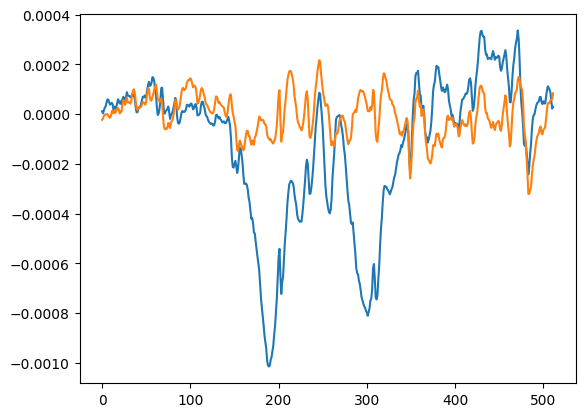

In [17]:
import matplotlib.pyplot as plt
plt.plot(data.T)

In [2]:
raw_edf = mne.io.read_raw_edf('/media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/CCEPs.EDF', preload=True)


Extracting EDF parameters from /media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/CCEPs.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9939071  =      0.000 ...  4853.062 secs...


/tmp/ipykernel_17803/842632447.py:1: RuntimeWarning: Omitted 4 annotation(s) that were outside data range.
  raw_edf = mne.io.read_raw_edf('/media/dan/Data/data/iEEG/raw_ieeg/patientDumps/PC/CCEPs.EDF', preload=True)


In [3]:
resampled = raw_edf.resample(2**8,n_jobs=60)

[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  12 tasks      | elapsed:   19.5s
[Parallel(n_jobs=60)]: Done 102 tasks      | elapsed:   57.0s
[Parallel(n_jobs=60)]: Done 141 out of 166 | elapsed:  1.2min remaining:   13.0s
[Parallel(n_jobs=60)]: Done 166 out of 166 | elapsed:  1.4min finished


In [4]:
import numpy as np
from mne_connectivity import (spectral_connectivity_epochs,
                              spectral_connectivity_time)



In [5]:
channels = resampled.ch_names
sF = resampled.info['sfreq']

In [6]:
picks = [ 'EEG TO3', 'EEG TO4', "EEG O'3", "EEG O'4",]
picks = [ 'EEG TO1','EEG TO2','EEG TO5','EEG TO6','EEG TO3', 'EEG TO4', "EEG O'3", "EEG O'4",]

start_time = 570
secs_to_take = 50
data = resampled.get_data(picks=picks,
 tmin=start_time,
 tmax=start_time + secs_to_take)

# downsample to 100 hz using mne


mi = np.max(np.min(data, axis=1))
ma = np.min(np.max(data, axis=1))

# create a random signal in the range of mi,ma and append it to the data
# data = np.vstack((data, np.random.uniform(mi, ma, size=(1, data.shape[1]))))

# create a signal with a constant value and append it to the data
# data = np.vstack((data, np.zeros((1, data.shape[1]))))

# import matplotlib.pyplot as plt
# plt.plot(data[3, :])

# data needs to be in the shape of (n_epochs, n_signals, n_times). We have only one epoch, so we add a new axis
data = data[np.newaxis, :, :]

In [128]:
print(data.shape)
max_F = 40

(1, 4, 12800)


Fmin was not specified. Using fmin=min(freqs)
Fmax was not specified. Using fmax=max(freqs).
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


Text(0.5, 1.0, 'Coherence')

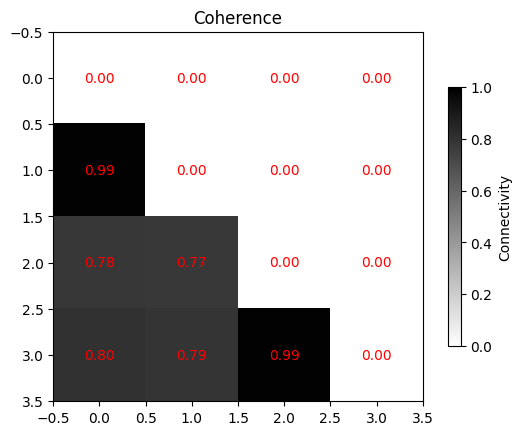

In [129]:
# Compute connectivity over time
con_time = spectral_connectivity_time(data, np.arange(max_F)+1,
                                      method='coh',
                                      sfreq=sF, mode="cwt_morlet",
                        
                                      faverage=True)
mat = con_time.get_data(output="dense").squeeze()

con_plot = plt.imshow(mat, cmap="binary", vmin=0, vmax=1)
plt.colorbar(con_plot, shrink=0.7, label='Connectivity')
# add the number in mat as red text
for (i, j), z in np.ndenumerate(mat):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color='r')

plt.title('Coherence')

Fmin was not specified. Using fmin=min(freqs)
Fmax was not specified. Using fmax=max(freqs).
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


Text(0.5, 1.0, 'Phase-Locking Value ')

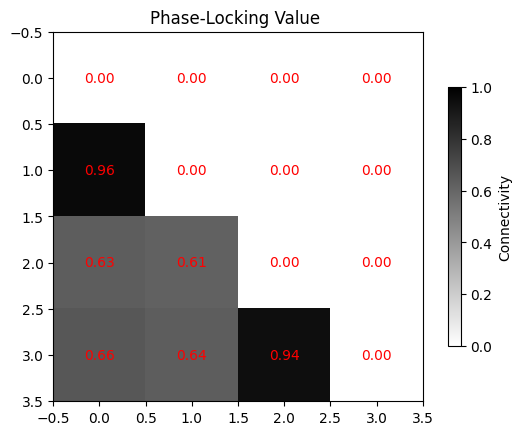

In [130]:
# Compute connectivity over time
con_time = spectral_connectivity_time(data, np.arange(max_F)+1,
                                      method='plv',
                                      sfreq=sF, mode="cwt_morlet",
                        
                                      faverage=True)
mat = con_time.get_data(output="dense").squeeze()

con_plot = plt.imshow(mat, cmap="binary", vmin=0, vmax=1)
plt.colorbar(con_plot, shrink=0.7, label='Connectivity')
# add the number in mat as red text
for (i, j), z in np.ndenumerate(mat):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color='r')

plt.title('Phase-Locking Value ')

Fmin was not specified. Using fmin=min(freqs)
Fmax was not specified. Using fmax=max(freqs).
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]


Text(0.5, 1.0, 'Phase-Lag Index')

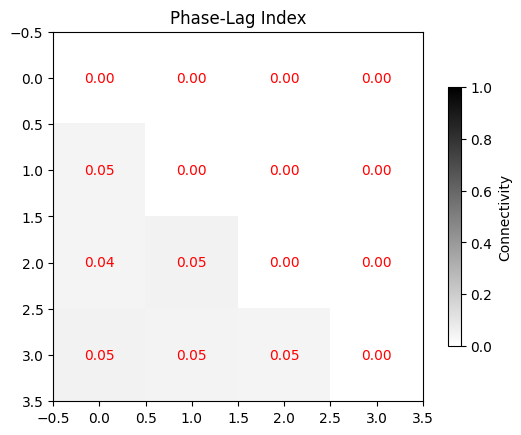

In [131]:
# Compute connectivity over time
con_time = spectral_connectivity_time(data, np.arange(max_F)+1,
                                      method='pli',
                                      sfreq=sF, mode="cwt_morlet",
                        
                                      faverage=True)
mat = con_time.get_data(output="dense").squeeze()

con_plot = plt.imshow(mat, cmap="binary", vmin=0, vmax=1)
plt.colorbar(con_plot, shrink=0.7, label='Connectivity')
# add the number in mat as red text
for (i, j), z in np.ndenumerate(mat):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color='r')

plt.title('Phase-Lag Index')

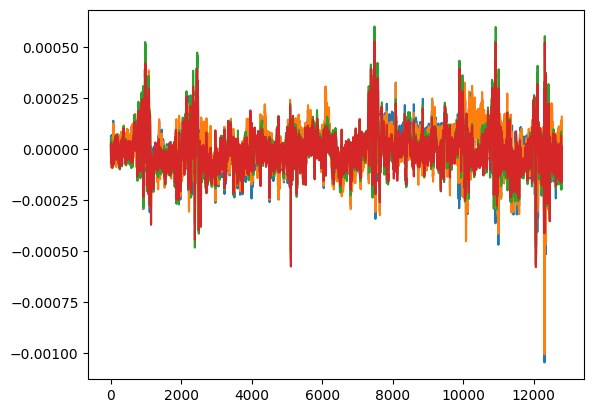

In [132]:
plt.plot(data.squeeze().T)

In [7]:
import pandas as pd
df = data.squeeze().T

# label the columns based on the picks.
df = pd.DataFrame(df)
df.columns = picks

# Calculate the sampling period in milliseconds
sampling_period_ms = 1000 / sF

# Generate the datetime range
date_range = pd.date_range(start='2020-01-01 00:00:00', periods=len(df), freq='{}ms'.format(sampling_period_ms))

# Add the datetime column to the DataFrame
df['datetime'] = date_range

In [9]:
df.to_csv("eeg.csv", index=False)

In [139]:
df.shape

(12800, 5)